In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [4]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
X = data['bpm']
Y = data['energy_%']

In [6]:
print(X)

0      125
1       92
2      138
3      170
4      144
      ... 
948    144
949    166
950     92
951     97
952     90
Name: bpm, Length: 953, dtype: int64


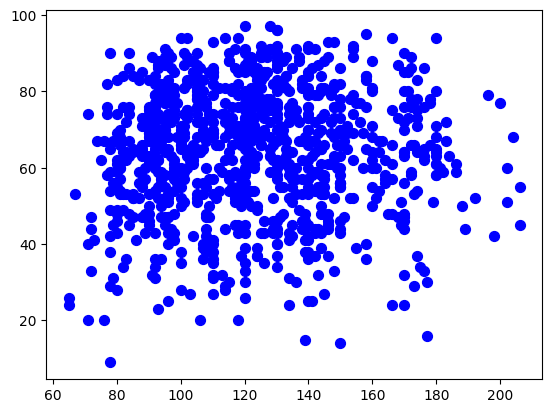

In [7]:
plt.scatter(X, Y, c="blue", marker='o', s=50)
plt.show()

In [8]:
best_artist = data['artist(s)_name'].value_counts().head(10)
best_bpm = data['bpm'].value_counts().head(10)

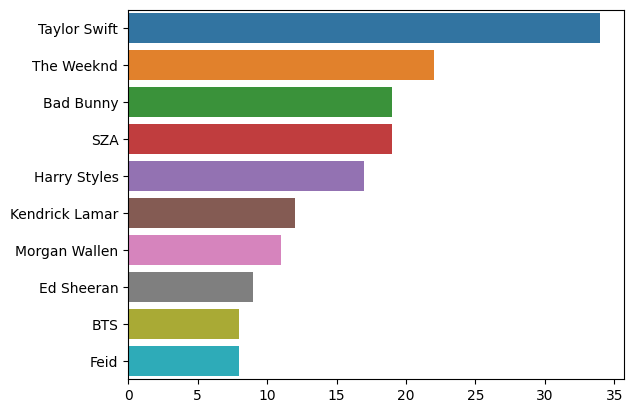

In [9]:
sns.barplot(x=best_artist.values, y=best_artist.index)
# sns.barplot(x=best_artist, y=best_rpm, color='red')
plt.show()

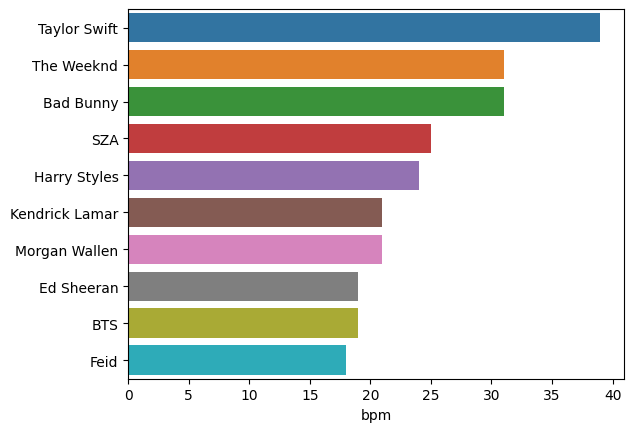

In [10]:
sns.barplot(x=best_bpm, y=best_artist.index)
plt.show()

Text(0, 0.5, 'frequency')

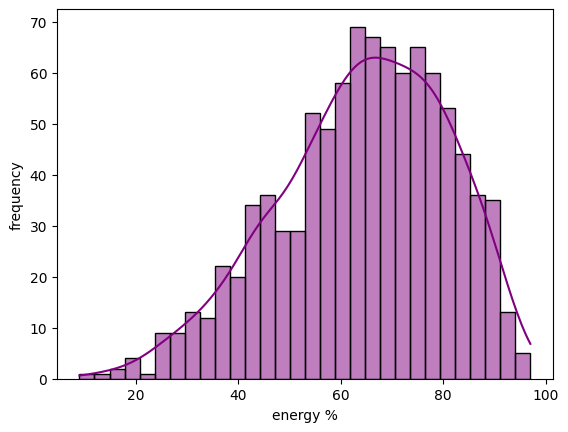

In [11]:
sns.histplot(data['energy_%'], bins=30, kde=True, color='purple')
plt.xlabel('energy %')
plt.ylabel('frequency')

In [12]:
avg_energy = data.groupby('released_year')['energy_%'].mean()

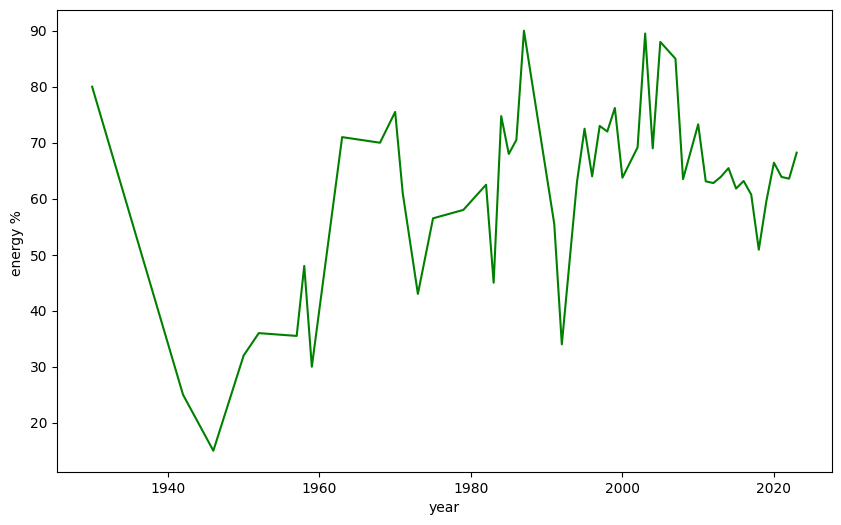

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_energy.index, y=avg_energy.values, color='green')
plt.xlabel('year')
plt.ylabel('energy % ')
plt.show()

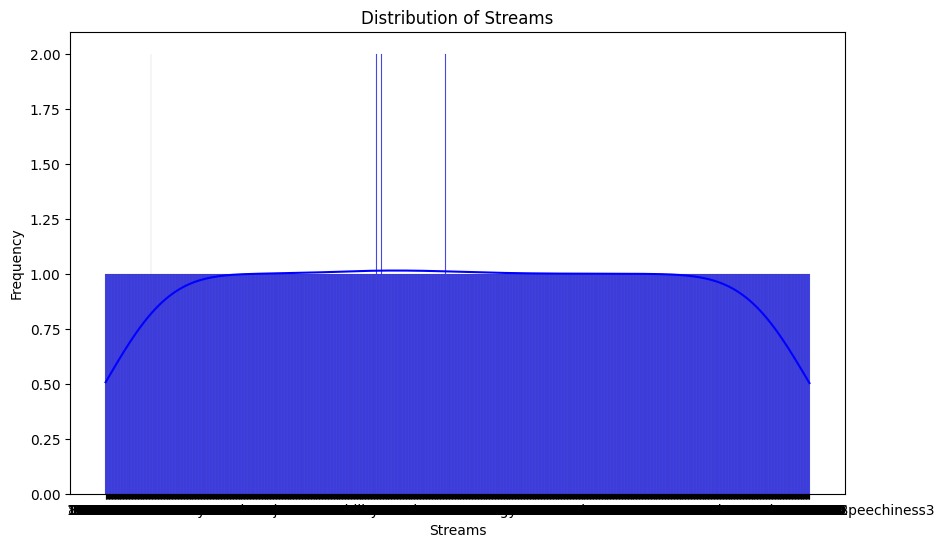

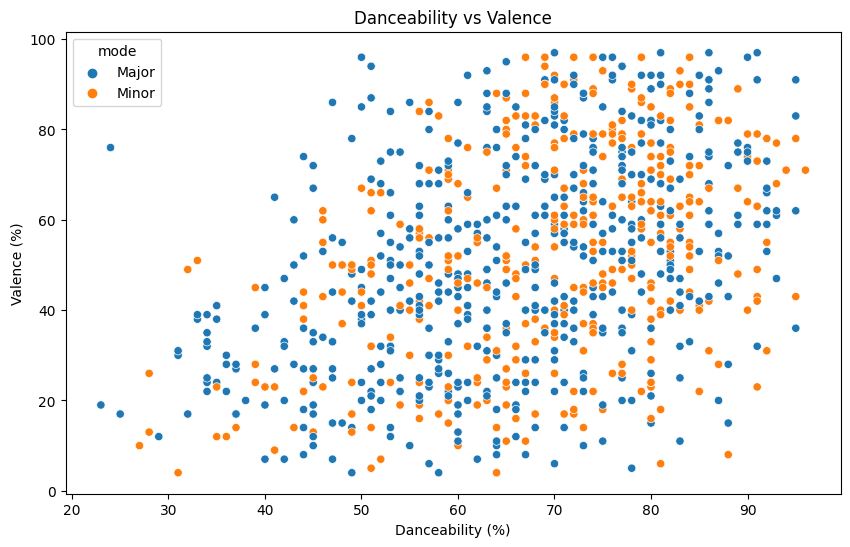

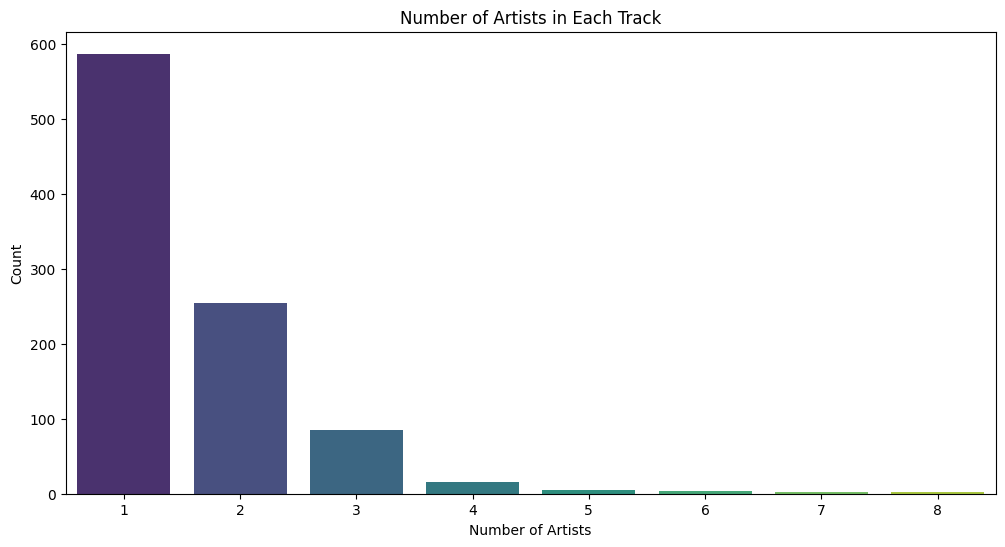

In [15]:
# Example: Distribution of streams
plt.figure(figsize=(10, 6))
sns.histplot(data['streams'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

# Example: Scatter plot of danceability vs valence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='valence_%', data=data, hue='mode')
plt.title('Danceability vs Valence')
plt.xlabel('Danceability (%)')
plt.ylabel('Valence (%)')
plt.show()

# Example: Bar plot of artist count
plt.figure(figsize=(12, 6))
sns.countplot(x='artist_count', data=data, palette='viridis')
plt.title('Number of Artists in Each Track')
plt.xlabel('Number of Artists')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_7768/809819430.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']].corr()


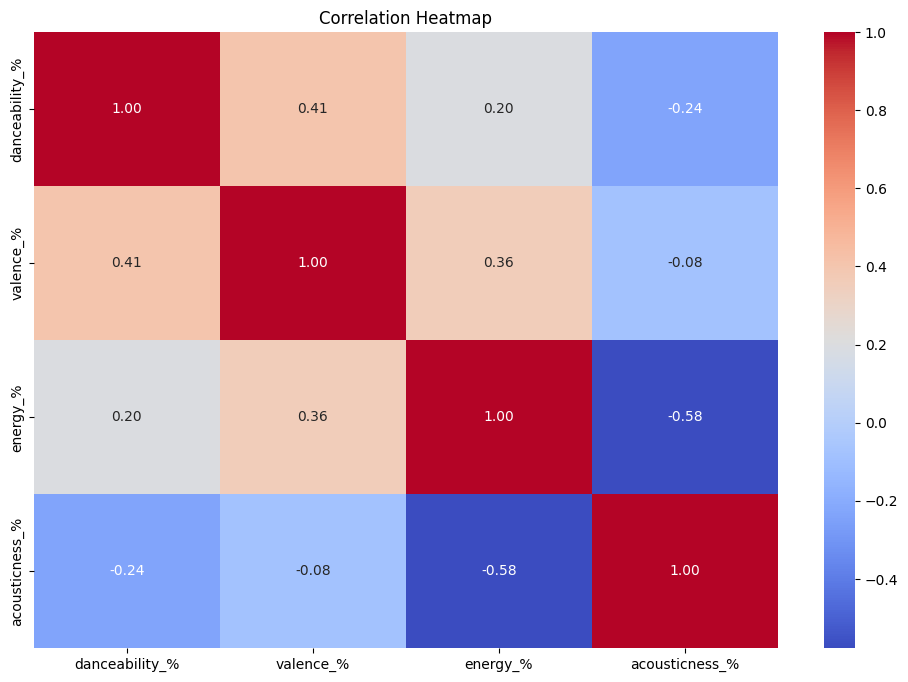

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

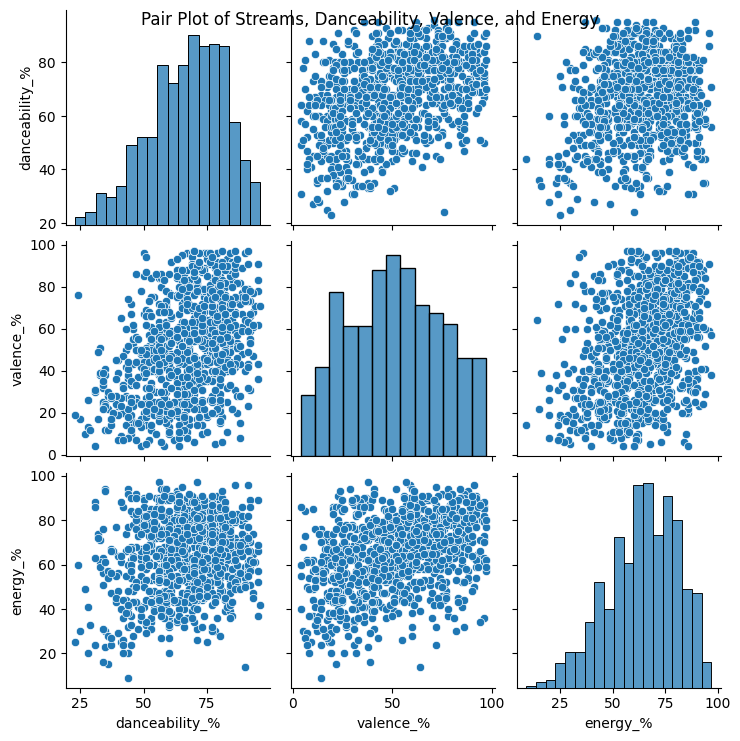

In [24]:
sns.pairplot(data[['streams', 'danceability_%', 'valence_%', 'energy_%']])
plt.suptitle('Pair Plot of Streams, Danceability, Valence, and Energy')
plt.show()




# plt.figure(figsize=(10, 8))
# playlist_counts = data['in_spotify_playlists'].value_counts()
# plt.pie(playlist_counts, labels=playlist_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
# plt.title('Distribution of Songs in Spotify Playlists')
# plt.show()



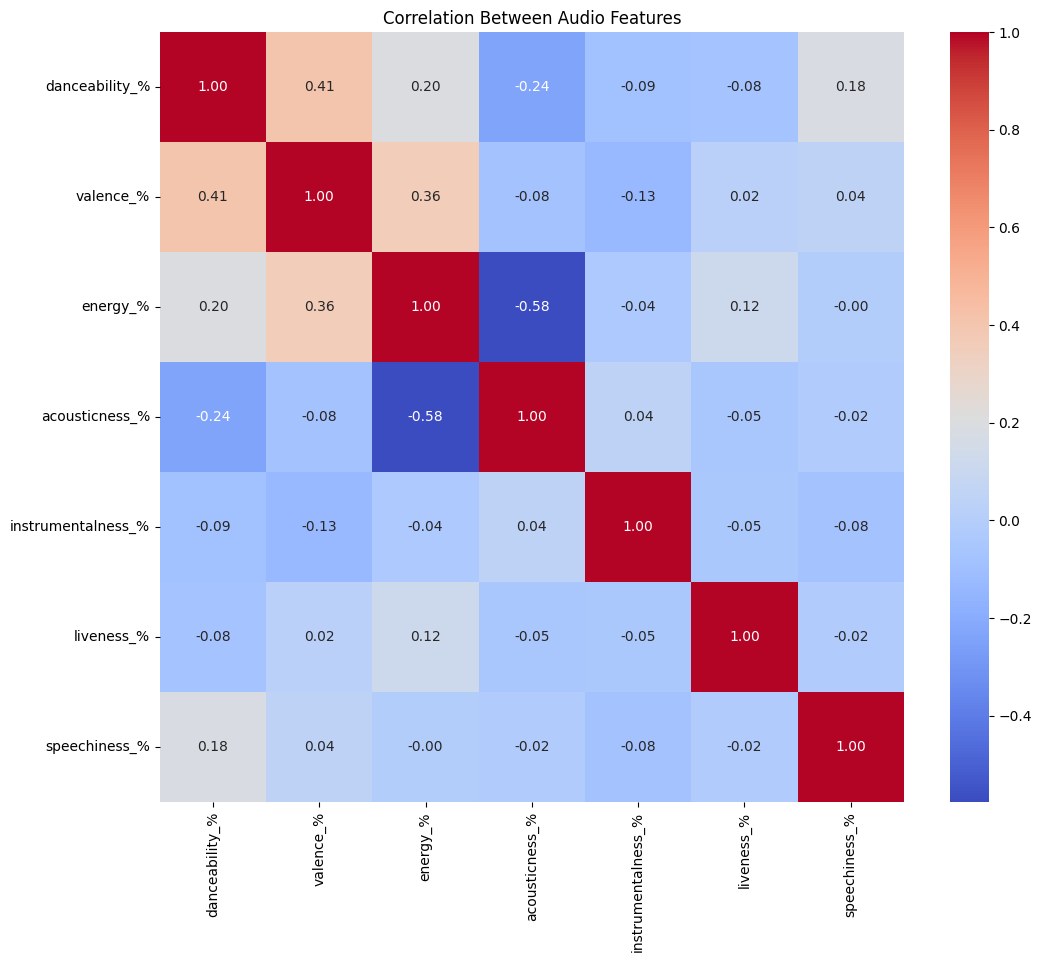

In [23]:
audio_features = data[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
correlation_matrix = audio_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Audio Features')
plt.show()